In [ ]:
NBA <- read.csv('/Data/NBA_Shots_Clean.csv', header=TRUE)
Player_Info <- read.csv('/Data/Player_Info.csv', header=TRUE)
Player_Salary <- read.csv('/Data/Player_Salary.csv', header=TRUE)
print(names(NBA))

print("")

print("")

 [1] "GAME_ID"             "DATE"                "HOME_TEAM"          
 [4] "AWAY_TEAM"           "PLAYER_NAME"         "PLAYER_ID"          
 [7] "LOCATION"            "WIN_LOSE"            "FINAL_MARGIN"       
[10] "SHOT_NUMBER"         "PERIOD"              "SEC_REMAIN"         
[13] "SHOT_CLOCK"          "DRIBBLES"            "TOUCH_TIME"         
[16] "SHOT_DIST"           "PTS_TYPE"            "CLOSEST_DEFENDER"   
[19] "CLOSEST_DEFENDER_ID" "CLOSE_DEF_DIST"      "SUCCESS"            
[1] ""
[1] ""


In the section below, we will look at the final margins for games played at home and games played away, and try to see whether a statistical advantage exists for teams playing at home.
Firstly, we will work out the skewness for our dataset. Then, we will attempt to fit a distribution to the home and away data
Because our home and away data are mirrors of each other (That is, our home data and away data are the reverse of each other as for every home win there is an away defeat with the same final margin), we can analyze only the home data and then use this to make conclusions about both the home and away data. Thus, we will work out the skewness of just the home data, as the away data will simply have the negative of this value

In [3]:
Margins_Home <- (NBA$FINAL_MARGIN[NBA$LOCATION == 'H'])
Remove_At <- c()
for (x in 1:length(Margins_Home)){
    if (x == 1){
        x <- 1
    }
    else if (Margins_Home[x] == Margins_Home[x-1]){
        Remove_At <- append(Remove_At, x)
    }
    else {
    
    }
}
Margins_Home <- Margins_Home[-Remove_At]

In [4]:
Running_Total <- 0
X_Bar <- mean(Margins_Home)
for (x in Margins_Home){
    Running_Total <- Running_Total + (x - X_Bar)^3
}
Running_Total <- Running_Total / (length(Margins_Home)*sd(Margins_Home)^3)

Running_Total

[1] 0.1299323

This skewness is less than 0.5, and thus the data is not considered to be significantly skewed (This is a standard figure for analysing skewness coeficients).A normal distribution has 0 skewness, and as we do not have a significant skewness here, we can take this as evidence that it is appropriate to use the central limit theorem to attempt to fit a normal distribution to this data.

We will assume that the final margins are independent of each other. Thus, we can assume by the central limit theorem (and the law of large numbers) that the final margins of home games, called M here, follow
$X \sim {N}(\mu, \sigma^2)$
where $\mu$ is the mean and $\sigma$ is the standard deviation
Now we need to estimate the mean and standard deviation of the distribution. The maximum likelihood estimator for this is the standard deviation of the sample. Thus, we will calculate this and fit that distribution for the histogram

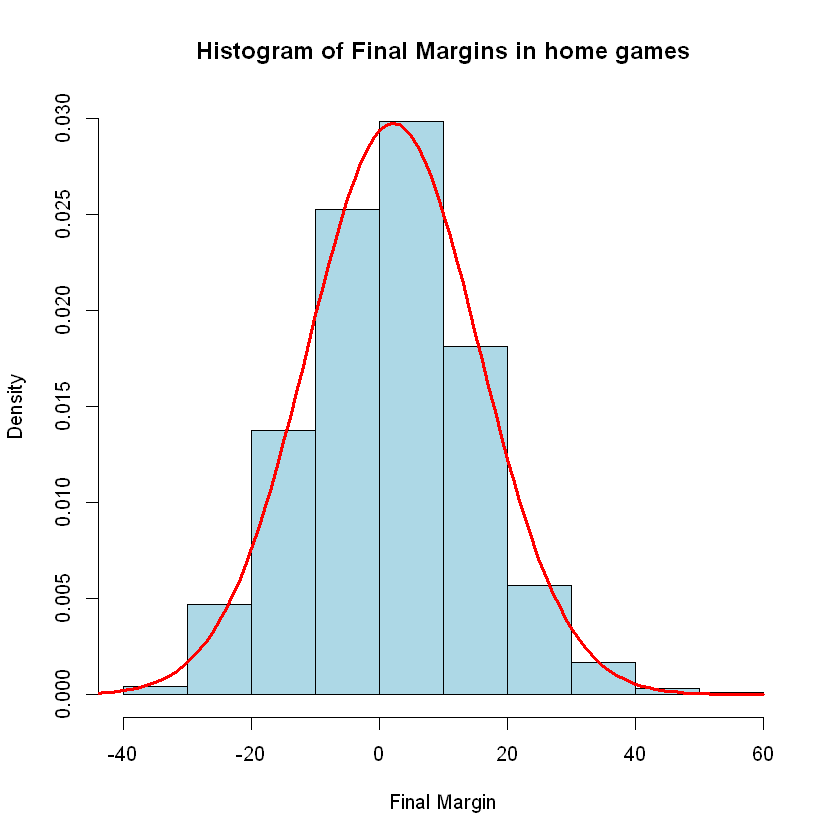

In [5]:
hist(Margins_Home, xlab = 'Final Margin', main='Histogram of Final Margins in home games', freq=FALSE, col='light blue')
lines(-60:60,dnorm(-60:60, mean=mean(Margins_Home), sd = sd(Margins_Home)), lwd=3, col='Red')

And now, with this approximated normal distribution, we will now perform a hypothesis test to see if we have enough evidence to reject a 0 mean for the entire population. If we can show that the population mean is greater than 0, we will have shown that there is evidence to support a statistical advantage for home teams in the NBA, especially since while the skewness of the data is very small, it is positive, and thus we have a slight asymmetrical dataset in favour of more positive values.

We will have null hypothesis Ho: $\mu$ = 0 and H1: $\mu$ > 0 and use a significance level of 1%

In [6]:
t.test(Margins_Home, mu=0, alternative = "greater", conf.level=0.99)


	One Sample t-test

data:  Margins_Home
t = 4.7173, df = 893, p-value = 1.386e-06
alternative hypothesis: true mean is greater than 0
99 percent confidence interval:
 1.070783      Inf
sample estimates:
mean of x 
 2.116331 


We can see that the p-value of this test is extremely low, far below 0.01, and thus we can confidently reject our null hypothesis and claim that the population of final margins of all home games will have a mean greater than zero. Thus, we can say that there is most likely a statistical homeside advantage for NBA teams.

Now let us explore some reasons that this may be the case. We are going to look into the number of shots taken each game by home and away teams. This will allow us to find some context on why home teams may be performing better than away teams. My hypothesis is that home teams are winning due to increased confidence, given to them by familiar surroundings, a shorter travel time, and home fans. This would be shown through an increase in aggressive play by home sides in the NBA, which the shots taken statistic will give us. First, let us find the basic statistics of this data

[1] 62089

[1] 62275

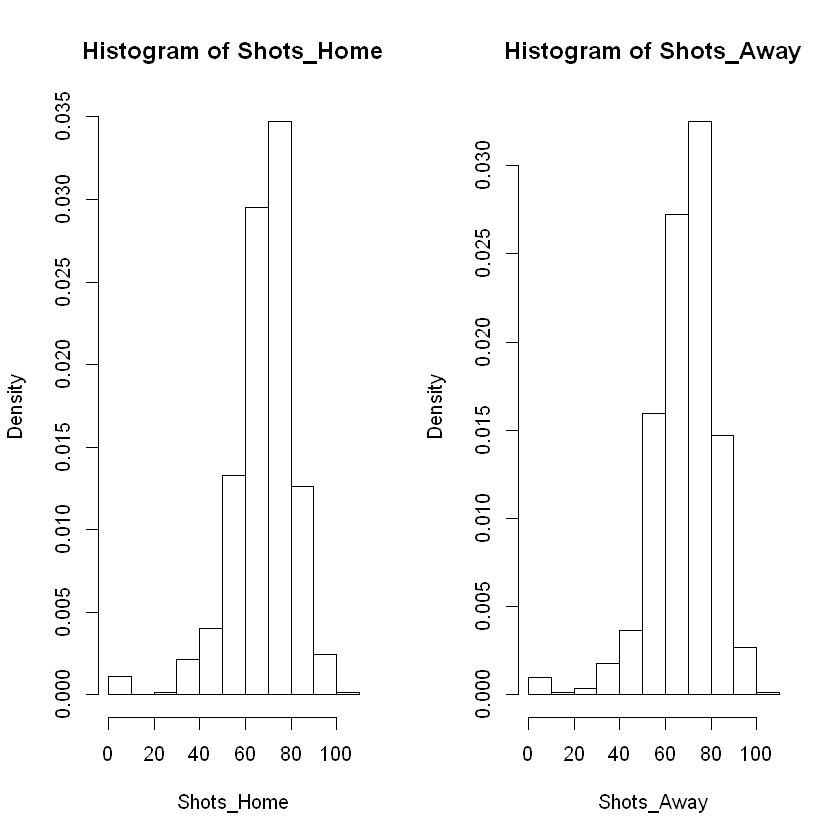

In [7]:
Shots_Home <- c()
Shots_Away <- c()

Unique_Games <- unique(NBA$GAME_ID)

for (X in Unique_Games){
    Shots_Home <- append(Shots_Home, nrow(subset(NBA, GAME_ID == X & LOCATION == 'H')))
    Shots_Away <- append(Shots_Away, nrow(subset(NBA, GAME_ID == X & LOCATION == 'A')))
}

par(mfrow = c(1, 2)) 
hist(Shots_Home, freq=FALSE)
hist(Shots_Away, freq=FALSE)

my_table <- setNames(Shots_Home, Shots_Away)
my_table <- as.table(my_table)
#my_table
sum(Shots_Home)
sum(Shots_Away)

We can see that these distributions of the data are extremely similar. Thus, let us see if they are, in fact, corrolated.

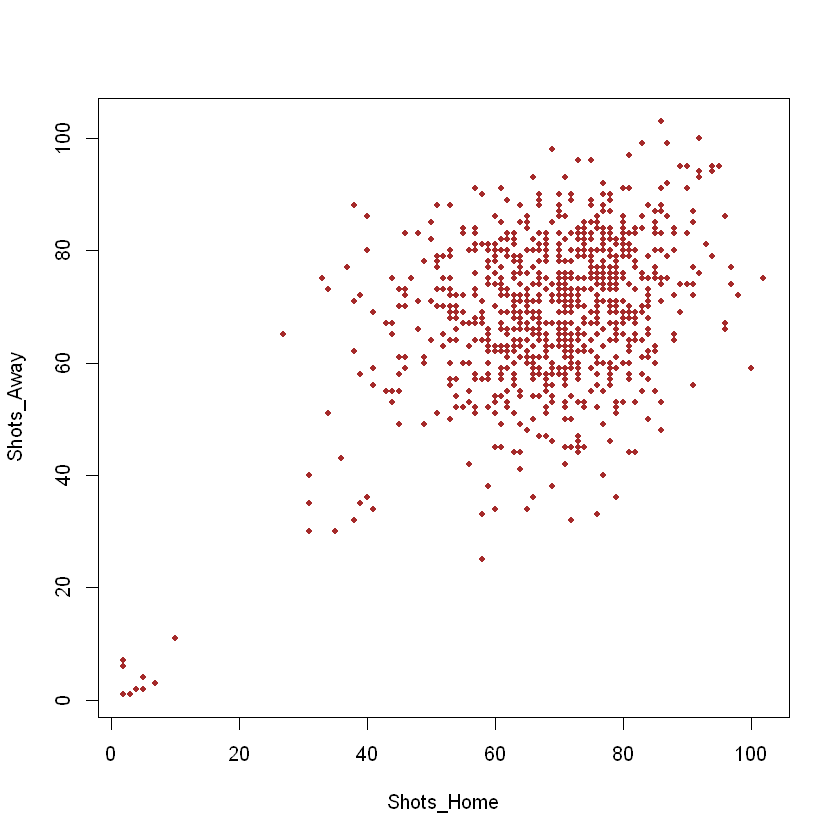

In [8]:
plot(Shots_Home, Shots_Away, pch=20, col='brown')

In [9]:
cor.test(Shots_Home, Shots_Away)


	Pearson's product-moment correlation

data:  Shots_Home and Shots_Away
t = 15.2, df = 902, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3980876 0.5019923
sample estimates:
      cor 
0.4515696 


We see by the Pearson Correlation Coefficient of 0.45 that there is a positive correlation between shots by the home team and shots by the away team. This implies that the home team having a large amount of shots does not mean that they are going to be dominating the game, as the away team is likely also making a large number of shots. The coefficient is not large however, as games will not always be close in either team's favour. Thus, we will perform a hypothesis test to see whether it is likely that both populations have the same mean. If this is true, then we can assume that home teams must instead be more successful in the shots that they take.

By the central limit theorem once more, we will assume that the data is approximately normally distributed, as the number of shots taken per game is assumed to be independent. We will check that the variences of each sample are approximately equivilent in order to use a t-test

In [10]:
sd(Shots_Home)
sd(Shots_Away)

t.test(Shots_Home, Shots_Away, var.equal=TRUE, conf.level = 0.99)

[1] 13.52623

[1] 13.89415


	Two Sample t-test

data:  Shots_Home and Shots_Away
t = -0.31903, df = 1806, p-value = 0.7497
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -1.868742  1.457238
sample estimates:
mean of x mean of y 
 68.68252  68.88827 


As we have a p-value of 0.7497, we have not got enough evidence from our dataset to suggest that the population means are different (in fact, it is most likely that they are, and so we can assume that the mean number of shots taken in home and away games are equal. Thus, we cannot say that the reason home teams have a statistical advantage is due to taking more shots. Thus, we must look into whether a home team's advantages are given by being more successful in the shots that they do take, or whether more high-point shots are being taken

0.7
1.9
3.1
4.3


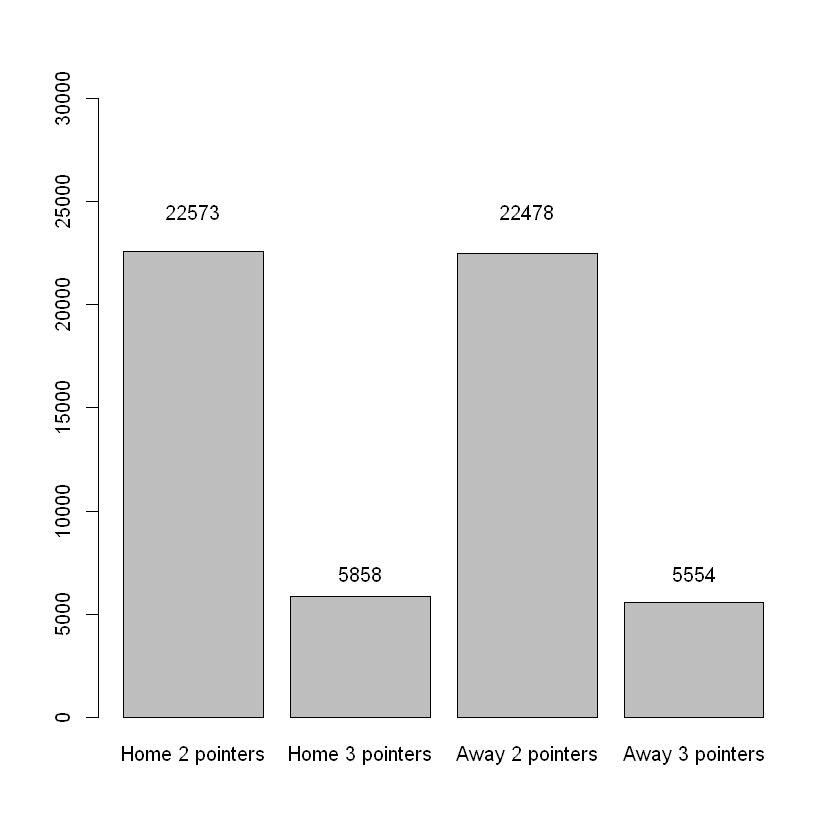

In [11]:
Shot_Types_Home <- (NBA$PTS_TYPE[NBA$LOCATION == 'H' & NBA$SUCCESS == 1])
Shot_Types_Away <- (NBA$PTS_TYPE[NBA$LOCATION == 'A' & NBA$SUCCESS == 1])
Plot <- barplot(c(length(Shot_Types_Home[Shot_Types_Home == 2]),length(Shot_Types_Home[Shot_Types_Home == 3]),
          length(Shot_Types_Away[Shot_Types_Away == 2]), length(Shot_Types_Away[Shot_Types_Away == 3])), 
          names.arg = c('Home 2 pointers', 'Home 3 pointers', 'Away 2 pointers', 'Away 3 pointers'), ylim = c(0, 30000))
Plot
text(x = Plot, y = c(24500, 7000, 24500, 7000), labels = c(length(Shot_Types_Home[Shot_Types_Home == 2]),length(Shot_Types_Home[Shot_Types_Home == 3]),
          length(Shot_Types_Away[Shot_Types_Away == 2]), length(Shot_Types_Away[Shot_Types_Away == 3])))

             

In [12]:
Home_Perc <- length(Shot_Types_Home[Shot_Types_Home == 3])/(length(Shot_Types_Home[Shot_Types_Home == 2]) + length(Shot_Types_Home[Shot_Types_Home == 3])) * 100
sprintf('3 pointers account for %f percent of successful home shots', Home_Perc)

Away_Perc <- length(Shot_Types_Away[Shot_Types_Away == 3])/(length(Shot_Types_Away[Shot_Types_Away == 2]) + length(Shot_Types_Away[Shot_Types_Away == 3])) * 100
sprintf('3 pointers account for %f percent of successful Away shots', Away_Perc)

[1] "3 pointers account for 20.604270 percent of successful home shots"

[1] "3 pointers account for 19.813071 percent of successful Away shots"

There is approximately a 0.8% increase in the proportion of 3 pointers being taken by home teams. This is an increase, but so small of one that it most likely does not account for the entire home side advantage present in games. Let us look at the number of successful shots being taken by each team

In [13]:
Shot_Suc_Home <- (nrow(subset(NBA, NBA$LOCATION == 'H' & NBA$SUCCESS == 1)))
Shot_Suc_Away <- (nrow(subset(NBA, NBA$LOCATION == 'A' & NBA$SUCCESS == 1)))
Suc_Shot_Home_PG <- c()
Suc_Shot_Away_PG <- c()

for (X in Unique_Games){
    Suc_Shot_Home_PG <- append(Suc_Shot_Home_PG, nrow(subset(NBA, GAME_ID == X & LOCATION == 'H' & NBA$SUCCESS == 1)))
    Suc_Shot_Away_PG <- append(Suc_Shot_Away_PG, nrow(subset(NBA, GAME_ID == X & LOCATION == 'A' & NBA$SUCCESS == 1)))
}



0.7
1.9


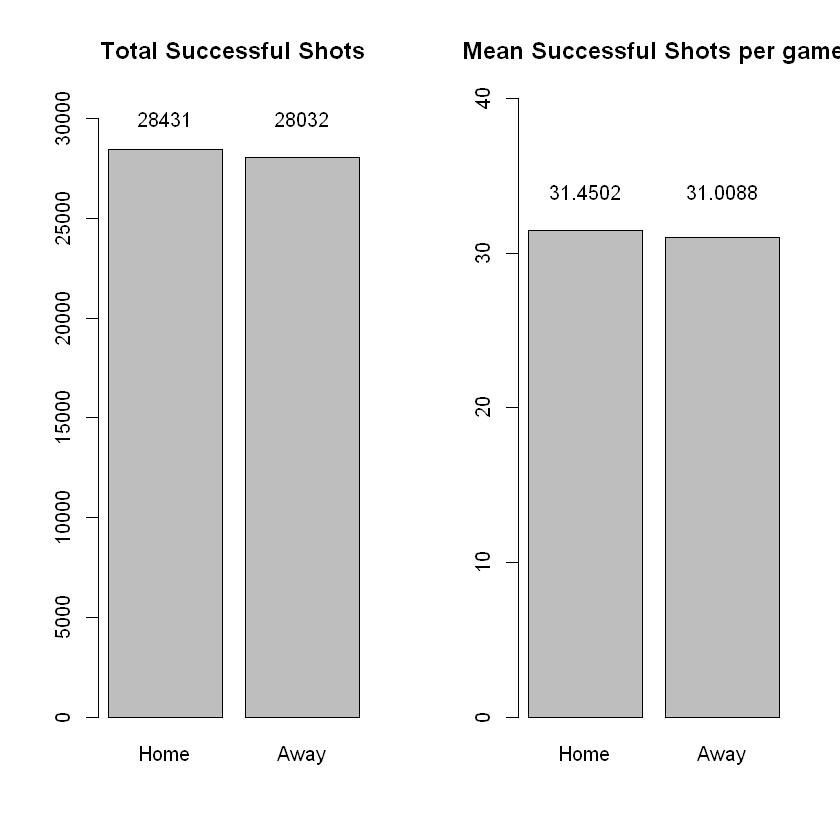

In [14]:
par(mfrow = c(1,2))
Plot <- barplot(c(Shot_Suc_Home, Shot_Suc_Away), 
          names.arg = c('Home', 'Away'), ylim = c(0,31000), main = 'Total Successful Shots')
Plot
text(x = Plot, y = c(30000, 30000), labels = c(nrow(subset(NBA, NBA$LOCATION == 'H' & NBA$SUCCESS == 1)), nrow(subset(NBA, NBA$LOCATION == 'A' & NBA$SUCCESS == 1))))


Plot2 <- barplot(c(mean(Suc_Shot_Home_PG), mean(Suc_Shot_Away_PG)), 
          names.arg = c('Home', 'Away'), 
                         ylim = c(0,40), main = 'Mean Successful Shots per game')

text(x = Plot2, y = c(34, 34), labels = c(round(mean(Suc_Shot_Home_PG), digits = 4), round(mean(Suc_Shot_Away_PG), digits = 4)))


In [15]:
t.test(Suc_Shot_Home_PG, Suc_Shot_Away_PG, var.equal=TRUE, conf.level = 0.95)


	Two Sample t-test

data:  Suc_Shot_Home_PG and Suc_Shot_Away_PG
t = 1.287, df = 1806, p-value = 0.1983
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2312396  1.1139830
sample estimates:
mean of x mean of y 
 31.45022  31.00885 


From the data here, we can see a very slight increase in successful shots from the home team per game, as well as a slight increase in the number of 3 point shots taken by the home team. This could account for the home advantage, however it would imply that the home advantage is in itself a very small factor. As the number of shots taken is not the cause of the home advantage, and the value and frequency of successful shots seems to be a small factor, we must consider how impactful the home advantage actually is to the game.

Now, let us look to see how individual players are affected by the home advantage. One possibility is that while on the whole our home advantage is small, there are individual players who respond so well to the comfort of playing at home that they are massively more successful when playing at home, and such they are the cause of our home advantage

In [16]:
Unique_Players <- unique(NBA$PLAYER_NAME)
Player_Suc_Shots_Prop <- c()
for (Name in Unique_Players){
    Player_Suc_Shots_Prop <- append(Player_Suc_Shots_Prop, 
                                    nrow(subset(NBA, LOCATION == 'H' & SUCCESS == 1 & PLAYER_NAME == Name))/nrow(subset(NBA, LOCATION == 'A' & SUCCESS == 1 & PLAYER_NAME == Name)))
}

In [17]:
Unique_Players[which.max(Player_Suc_Shots_Prop)]
Player_Suc_Shots_Prop[which.max(Player_Suc_Shots_Prop)]
nrow(subset(NBA, SUCCESS == 1 & PLAYER_NAME == Unique_Players[which.max(Player_Suc_Shots_Prop)]))

Unique_Players[which.min(Player_Suc_Shots_Prop)]
Player_Suc_Shots_Prop[which.min(Player_Suc_Shots_Prop)]
nrow(subset(NBA, SUCCESS == 1 & PLAYER_NAME == Unique_Players[which.min(Player_Suc_Shots_Prop)]))


[1] Derrick Williams
281 Levels: Aaron Brooks Aaron Gordon Al Farouq Aminu ... Zaza Pachulia

[1] 1.97619

[1] 125

[1] Robbie Hummel
281 Levels: Aaron Brooks Aaron Gordon Al Farouq Aminu ... Zaza Pachulia

[1] 0.4736842

[1] 56

Here we see that the player Derrick Williams has nearly twice as many successful shots when playing at home than when playing away! Thats about 66% of his successful shots taken when at home!
On the other hand, Robbie Hummel has scored almost 66% of his successful shots when away! Now let us look at the distribution of this

[1] "calculated by number of successful shots at home divided by the number of successful shots away"


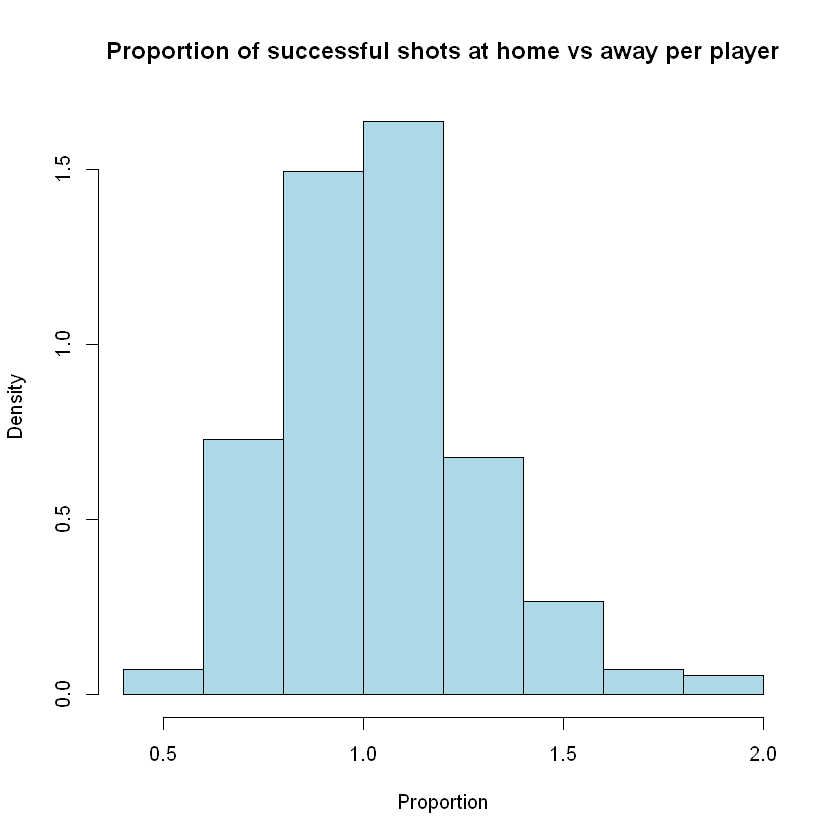

In [18]:
hist(Player_Suc_Shots_Prop, freq=FALSE, main = 'Proportion of successful shots at home vs away per player', 
     col='Light Blue', xlab='Proportion')
print("calculated by number of successful shots at home divided by the number of successful shots away")

This histogram shows us something interesting. Most player's tend to hover around scoring an equal amount of shots when home and away. However, the players who are affected by this the most actually score much more when at home, which is most likely where our differential is coming from. The players who are performing better in away games seem to be marginally more successful away. Let us see this data again, but for the following statistics:
1) Proportion of shots which are successful at home

2) Proportion of successful 3 pointers scored at home vs away

In [19]:
Player_Suc_Shots_Home <- c()
Player_Suc_TP <- c()
Player_Suc_Shots_Away <- c()
for (Name in Unique_Players){
    Player_Suc_Shots_Home <- append(Player_Suc_Shots_Home, 
                                    nrow(subset(NBA, LOCATION == 'H' & SUCCESS == 1 & PLAYER_NAME == Name))/nrow(subset(NBA, PLAYER_NAME == Name)))
    Player_Suc_Shots_Away <- append(Player_Suc_Shots_Away, 
                                    nrow(subset(NBA, LOCATION == 'A' & SUCCESS == 1 & PLAYER_NAME == Name))/nrow(subset(NBA, PLAYER_NAME == Name)))
    Player_Suc_TP <- append(Player_Suc_TP, 
                                    nrow(subset(NBA, LOCATION == 'H' & SUCCESS == 1 & PLAYER_NAME == Name & PTS_TYPE == 3))/nrow(subset(NBA, SUCCESS == 1 & PLAYER_NAME == Name & PTS_TYPE == 3)))

}

[1] "On average players score 22.730648 percent of their shots at home"

[1] "On average players score 22.617695 percent of their shots at away"

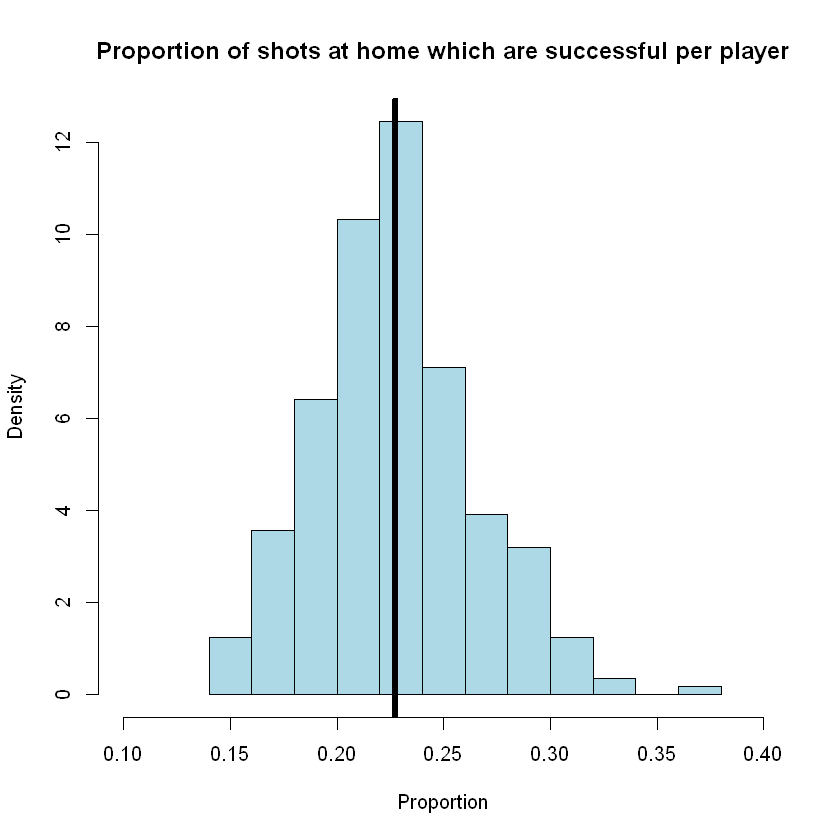

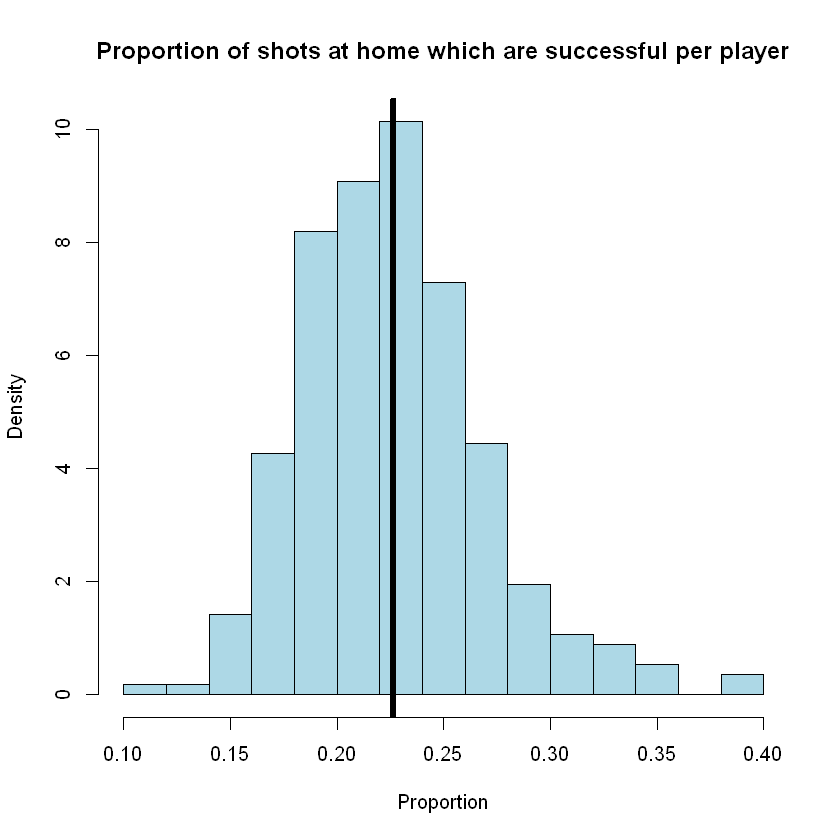

In [20]:
sprintf("On average players score %f percent of their shots at home", mean(Player_Suc_Shots_Home)*100)
sprintf("On average players score %f percent of their shots at away", mean(Player_Suc_Shots_Away)*100)
hist(Player_Suc_Shots_Home, freq=FALSE, main = 'Proportion of shots at home which are successful per player', 
     col='Light Blue', xlab='Proportion', xlim=c(0.1,0.4))
abline(v=mean(Player_Suc_Shots_Home), lwd=5)

hist(Player_Suc_Shots_Away, freq=FALSE, main = 'Proportion of shots at home which are successful per player', 
     col='Light Blue', xlab='Proportion', xlim=c(0.1,0.4))
abline(v=mean(Player_Suc_Shots_Away), lwd=5)


[1] "The total number of players with a higher number of 3 pointers at home than away is 115"

[1] "The total number of players with a higher number of 3 pointers away than at home is 99"

[1] "The total number of players with the same number of 3 pointers away and at home is 22"

[1] "The mean proportion of 3 pointers at home vs away is 0.493066"

[1] "The mean proportion of 3 pointers at home vs away for players who score more at home is 0.602721"

[1] "The mean proportion of 3 pointers at home vs away for players who score more away is 0.364148"

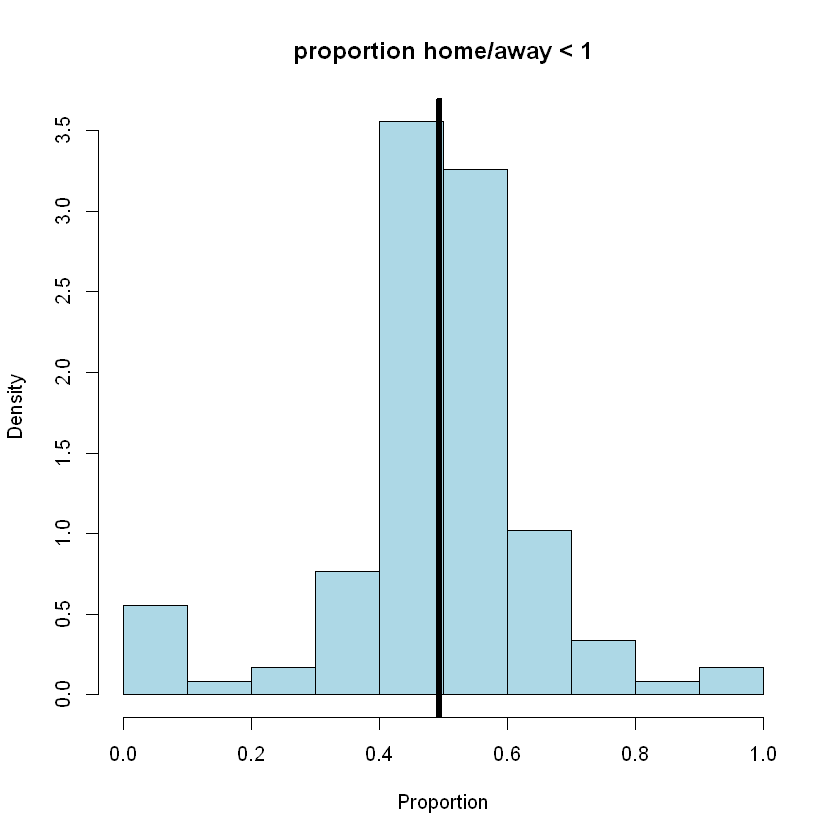

In [21]:
#par(mfrow = c(1,2))
hist(Player_Suc_TP, main = 'proportion home/away < 1', 
     col='Light Blue', xlab='Proportion', freq=FALSE)
abline(v=mean(Player_Suc_TP[is.nan(Player_Suc_TP) == FALSE]), lwd = 5)
#hist(Player_Suc_TP[Player_Suc_TP > 1], main = 'proportion home/away > 1', 
  #   col='Light Blue', xlab='Proportion')
sprintf('The total number of players with a higher number of 3 pointers at home than away is %d', length(Player_Suc_TP[Player_Suc_TP > 0.5 & is.nan(Player_Suc_TP) == FALSE]))
sprintf('The total number of players with a higher number of 3 pointers away than at home is %d', length(Player_Suc_TP[Player_Suc_TP < 0.5 & is.nan(Player_Suc_TP) == FALSE]))
sprintf('The total number of players with the same number of 3 pointers away and at home is %d', length(Player_Suc_TP[Player_Suc_TP == 0.5 & is.nan(Player_Suc_TP) == FALSE]))
sprintf('The mean proportion of 3 pointers at home vs away is %f', mean(Player_Suc_TP[is.nan(Player_Suc_TP) == FALSE]))
sprintf('The mean proportion of 3 pointers at home vs away for players who score more at home is %f', mean(Player_Suc_TP[Player_Suc_TP > 0.5 & is.nan(Player_Suc_TP) == FALSE]))
sprintf('The mean proportion of 3 pointers at home vs away for players who score more away is %f', mean(Player_Suc_TP[Player_Suc_TP < 0.5 & is.nan(Player_Suc_TP) == FALSE]))

The data above shows that clearly players who score more while away, while less common, are actually more weighted to scoring much more while away. Let us check if the players who score more three pointers at home are players who are more experienced. If this is true, then the players who participate in more games are the players who are positively affected by playing at home, and thus would imply that our home advantage is given by an advantage in the players who contribute to the most games.
Note that in the below code, as we run through the data in the same order as in previous vectors, the corresponding indexed values (i.e entry n in Games_Per_Player and Player_Suc_TP) correspond to a value from the same player.

In [22]:
Games_Per_Player <- c()
for (Name in Unique_Players){
    Games_Per_Player <- append(Games_Per_Player,(nrow(subset(NBA, PLAYER_NAME == Name))))
}

for (x in 1:length(Games_Per_Player)){
    if (is.nan(Player_Suc_TP[x])){
        Games_Per_Player <- Games_Per_Player[-x]
        Player_Suc_TP <- Player_Suc_TP[-x]
    }
}

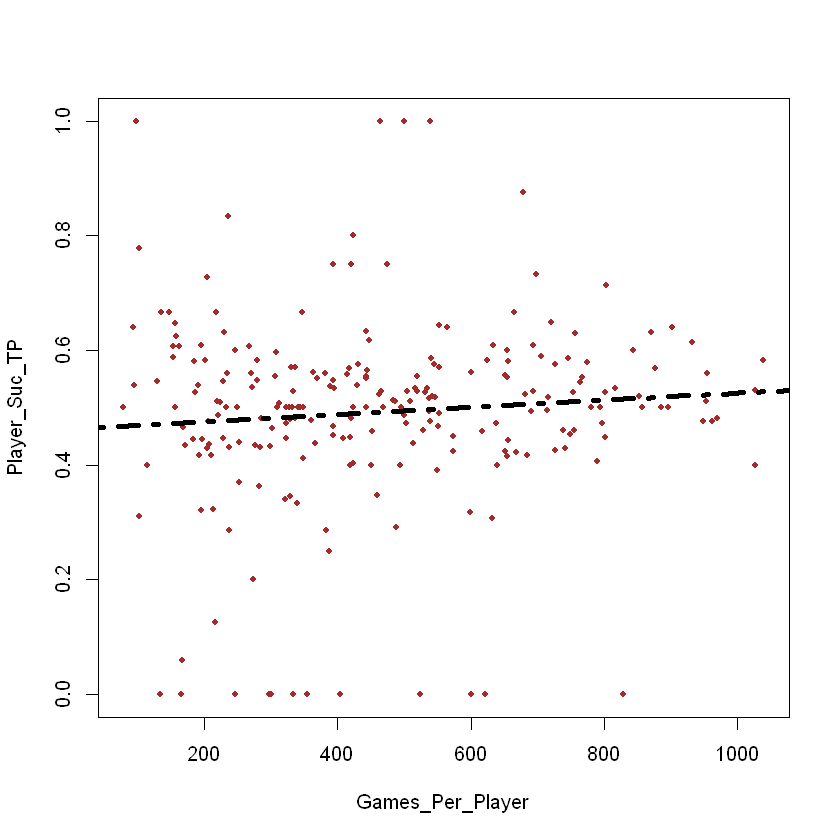

In [23]:
plot(Games_Per_Player, Player_Suc_TP,  pch=20, col='brown')
abline(lm(Player_Suc_TP ~ Games_Per_Player), lwd=4, lty=4)

We can see a positive gradient in our line, and so we can say that more experienced players tend to scoring more 3 pointers at home